In [1]:
# The code was removed by Watson Studio for sharing.

# Airbnb Investment in Melbourne, Australia
## Smart property investment using data science and machine learning
### Applied Data Science Capstone Project by IBM/Coursera
#### 19/01/2020


## Table of contents
* [Introduction : Business problem](#introduction)
* [Data](#data)
* [Methodology](#methodo)
* [Housing Data Cleaning & wrangling](#housing)
* [Airbnb Data Cleaning & wrangling](#airbnb)

## Introduction : Business problem <a name="introduction"></a>

**Airbnb** has become one of the biggest players in the world's holiday accommodation industry. It exists in **more than 65,000 cities across 190+ countries all over the world**.

**Infik** published in 2019, the list of the top Airbnb cities, based on **AirDNA** database. The city of Melbourne was number 10 with 19.055 Airbnb Listings.

As the sporting and cultural capital of Australia, Melbourne has so much to offer visitors from all over the world. It is a culturally diverse city offering some of the best living standards throughout Australia.

This is where I decided to capitalize on the short-term rental demand created by Airbnb.

The study is part of 'The Battle of Neighborhoods' Coursera Applied data science capstone project. It concludes the wonderful IBM Data science Professional Certificate set of courses, which I highly recommand to anyone who is into data science and Machine Learning.

My task is to understand the revenue potential of short-term vacation in Melbourne, and explore the performance of specific neighborhoods. 

The main questions will be : 

* Are there any clusters of similar neighborhoods in Melbourne ?
* Where should I invest ? Is there any significant relationship between cluster and housing price ?
* What are the significant caracteristics that allow us to predict the property price ? And what confidence level do we have in our model ?
* Are there any specific features that can help us maximize the rental revenues ?

At the end, I would like to share with ou my insights, being able, to estimate the right price versus the estimated annual rental revenue.

***

## Data <a name="data"></a>

### Melbourne Housing Market

**Melbourne_housing_FULL** : The dataset was taken from Kaggle. The data was scraped from publicly available results posted every week from **Domain.com.au**. It was cleaned by Tony Pino and last updated in august 2018. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

The features are :
* **_Suburb_**
* **_Address_**
* **_Rooms_**: Number of rooms
* **_Price_**: Price in Australian dollars
* **_Method_**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
* **_Type_**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
* **_SellerG_**: Real Estate Agent
* **_Date_**: Date sold
* **_Postcode_**
* **_Distance_**: Distance from CBD in Kilometres
* **_Regionname_**: General Region (West, North West, North, North east ...etc)
* **_Propertycount_**: Number of properties that exist in the suburb.
* **_Bedroom2_** : Scraped # of Bedrooms (from different source)
* **_Bathroom_**: Number of Bathrooms
* **_Car_**: Number of carspots
* **_Landsize_**: Land Size in Metres
* **_BuildingArea_**: Building Size in Metres
* **_YearBuilt_**: Year the house was built
* **_CouncilArea_**: Governing council for the area
* **_Lattitude_**
* **_Longtitude_**

The Melbourne Housing dataset has :
* **34857** houses sold,
* across **211** suburbs,
* with an average price of : **$1050173**,
* with **21** features

### Melbourne Airbnb Open Data

**cleansed_listings_dec18** : The dataset was also taken from Kaggle and is originally part of Inside Airbnb. This an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world.
The original raw csv file has eighty-four (84) columns, some of which won't be needed for analysis such as host_url, host_about, access, interaction, summary, mainly *strings* describing the listings.

The original raw csv file is quite big and has **eighty-four** (84) columns, some of which won't be needed for analysis such as host_url, host_about, access, interaction, summary, mainly strings describing the listings.

After cleaning the dataset, keeping all relevant features, the Greater Melbourne area had:
* **22,895** listings,
* across **247** suburbs,
* hosted by **14,988** hosts,
* with an average nightly rate at **$148**.
* with **33** features left.

To answer the questions, I propose to generate three new features, for each listing :
* **_occupancy_rate_**
* **_nights_per_year_**
* **_income_per_month_**

based on **_minimum_nights_** , **_price_**, **_number_of_reviews_**, **_first_review_** and **_last_review_**, making some assumptions described later in this project.

### Exploring neighborhoods using Foursquare API

The **clustering** part of our project will be based on a list of **zip codes** extracted from both dataframes.

As you can see, the info is stored in the **_Postcode_** column in **_housing_df_** dataframe. It is stored in the **_zipcode_** column in **_airbnb_df_** dataframe.

We will use the **_airbnb_df_** zip codes, as there are more than in the **_housing_df_**. (**247** vs. **211**).

***
## Methodology <a name= "methodo"></a>

The methodology of our study is described in the flow chart below :

* we will first perform some preper **data cleaning** & **data wrangling** on both datasets
* then using the **Foursquare API** we will add some valuable insights in our datasets using the **zipcode/Postcode** feature
* **data visualization** will be performed based on our **clustered datasets**
* Based on the **housing_clustered** dataset, we will try to build a model to predict the **housing price**
* Finally based on all the insights we gathered, we will do the the **financial analysis** for our short term investment study

For clearer understanding, these different activities will be done on different notebooks.

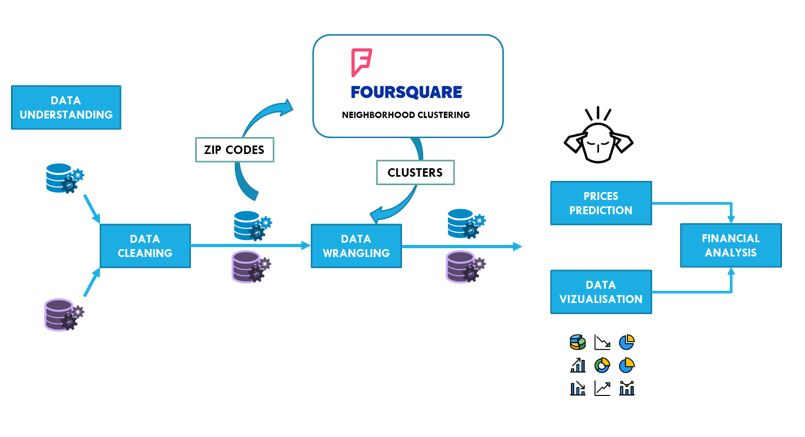

### import data

In [ ]:
import types
import numpy as np
import pandas as pd
from botocore.client import Config
import ibm_boto3

In [2]:
# The code was removed by Watson Studio for sharing.

,id,name,host_id,host_location,street,neighborhood,city,suburb,zipcode,smart_location,...,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,cancellation_policy,require_guest_phone_verification,reviews_per_month
0,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,50121,"Melbourne, Victoria, Australia","St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,3182.0,"St Kilda, Australia",...,26,51,326,15,8/4/2010,11/7/2018,94.0,strict_14_with_grace_period,f,0.15
1,38271,Melbourne - Old Trafford Apartment,164193,"Berwick, Victoria, Australia","Berwick, VIC, Australia",NaN,Casey,Berwick,3806.0,"Berwick, Australia",...,27,57,328,112,11/24/2010,12/1/2018,97.0,flexible,f,1.14
2,43429,Tranquil Javanese-Style Apartment in Oakleigh ...,189684,"Melbourne, Victoria, Australia","Oakleigh East, VIC, Australia",NaN,Monash,Oakleigh East,3166.0,"Oakleigh East, Australia",...,25,35,310,168,12/5/2010,12/3/2018,97.0,moderate,f,1.72
3,50492,St Kilda Central LUXE 2BR APT+TWO COURTYARDS+WIFI,50121,"Melbourne, Victoria, Australia","St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,3182.0,"St Kilda, Australia",...,22,44,316,44,11/30/2012,12/2/2018,97.0,strict_14_with_grace_period,f,0.60
4,62606,A Room Near the Park,277353,"Melbourne, Victoria, Australia","Melbourne, VIC, Australia",Brighton,Bayside,Melbourne,3187.0,"Melbourne, Australia",...,23,53,328,21,3/5/2011,11/29/2018,84.0,moderate,f,0.22


In [3]:
print('Number of listings: ', airbnb_df.shape[0])
print('Number of features in dataset: ', airbnb_df.shape[1])
print('Average price at: ${}'.format(round(airbnb_df.price.mean())))
print('Number of hosts: ', airbnb_df.host_id.nunique())
print('Number of suburbs: ',airbnb_df.zipcode.nunique())

Number of listings:  22895
Number of features in dataset:  33
Average price at: $148
Number of hosts:  14988
Number of suburbs:  247


In [4]:
body = client_b80010563ad347059cff30c3cec0a156.get_object(Bucket='airbnbinvestmentinmelbourneaustra-donotdelete-pr-u7czrdfljykae0',Key='Melbourne_housing_FULL.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

housing_df = pd.read_csv(body)
housing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
print('Number of houses: ', housing_df.shape[0])
print('Number of features in dataset: ', housing_df.shape[1])
print('Average price at: ${}'.format(round(housing_df.Price.mean())))
print('Number of suburbs: ',housing_df.Postcode.nunique())

Number of houses:  34857
Number of features in dataset:  21
Average price at: $1050173
Number of suburbs:  211


***
## Data cleaning & wrangling : housing dataframe <a name= "housing"></a>

**Count missing values in each column**

Using a for loop in Python, let's figure out the number of missing values in each column in housing_df dataframe. 

In [6]:
for column in housing_df.isnull().columns.values.tolist():
    print(column)
    print (housing_df.isnull()[column].value_counts())
    print("")    

Suburb
False    34857
Name: Suburb, dtype: int64

Address
False    34857
Name: Address, dtype: int64

Rooms
False    34857
Name: Rooms, dtype: int64

Type
False    34857
Name: Type, dtype: int64

Price
False    27247
True      7610
Name: Price, dtype: int64

Method
False    34857
Name: Method, dtype: int64

SellerG
False    34857
Name: SellerG, dtype: int64

Date
False    34857
Name: Date, dtype: int64

Distance
False    34856
True         1
Name: Distance, dtype: int64

Postcode
False    34856
True         1
Name: Postcode, dtype: int64

Bedroom2
False    26640
True      8217
Name: Bedroom2, dtype: int64

Bathroom
False    26631
True      8226
Name: Bathroom, dtype: int64

Car
False    26129
True      8728
Name: Car, dtype: int64

Landsize
False    23047
True     11810
Name: Landsize, dtype: int64

BuildingArea
True     21115
False    13742
Name: BuildingArea, dtype: int64

YearBuilt
True     19306
False    15551
Name: YearBuilt, dtype: int64

CouncilArea
False    34854
True         3

We notice that **7610** rows do not have any **Price**. As our main goal with this dataset is to be able to predict price, we decided to drop the corresponding rows.  

Also **13742** rows do not have a **BuildingArea** value. As it is typical to evaluate the housing price compared to a **Price per meter square** as an important feature, we drop the rows with no **BuildingArea** value.


In [7]:
housing_df.dropna(subset=['Price'], axis=0, inplace=True)
housing_df.dropna(subset=['BuildingArea'], axis=0, inplace=True)

Let us check the remaining data :

In [8]:
for column in housing_df.isnull().columns.values.tolist():
    print(column)
    print (housing_df.isnull()[column].value_counts())
    print("")    

Suburb
False    10656
Name: Suburb, dtype: int64

Address
False    10656
Name: Address, dtype: int64

Rooms
False    10656
Name: Rooms, dtype: int64

Type
False    10656
Name: Type, dtype: int64

Price
False    10656
Name: Price, dtype: int64

Method
False    10656
Name: Method, dtype: int64

SellerG
False    10656
Name: SellerG, dtype: int64

Date
False    10656
Name: Date, dtype: int64

Distance
False    10656
Name: Distance, dtype: int64

Postcode
False    10656
Name: Postcode, dtype: int64

Bedroom2
False    10656
Name: Bedroom2, dtype: int64

Bathroom
False    10656
Name: Bathroom, dtype: int64

Car
False    10479
True       177
Name: Car, dtype: int64

Landsize
False    9382
True     1274
Name: Landsize, dtype: int64

BuildingArea
False    10656
Name: BuildingArea, dtype: int64

YearBuilt
False    10249
True       407
Name: YearBuilt, dtype: int64

CouncilArea
False    10656
Name: CouncilArea, dtype: int64

Lattitude
False    10647
True         9
Name: Lattitude, dtype: int64

Lo

#### Landsize

We can see there are still some assumptions to make... Especially with the **Landsize** feature.  

With no further investigations, as the **Landsize** could be an important feature to sell a house, we consider that if it is not specified, it means that there is no land in the corresponding house.

This translates as replacing *NaN* values by zero.

In [9]:
housing_df["Landsize"].replace(np.nan, 0, inplace=True)

In [10]:
housing_df['Landsize'].describe()

count    10656.000000
mean       464.293450
std       1149.411449
min          0.000000
25%        116.000000
50%        387.000000
75%        629.000000
max      44500.000000
Name: Landsize, dtype: float64

In [11]:
land = housing_df[(housing_df['Landsize'] > 20000)]

land

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13462,Port Melbourne,55/4 Seisman Pl,2,u,1030000.0,S,Buxton,29/04/2017,3.8,3207.0,...,2.0,2.0,21715.0,99.0,2005.0,Melbourne City Council,-37.84240,144.94490,Southern Metropolitan,8648.0
15109,Maribyrnong,2/6 Horizon Dr,2,u,585000.0,S,Brad,3/06/2017,4.3,3032.0,...,2.0,2.0,37000.0,90.0,2004.0,Maribyrnong City Council,-37.77518,144.89254,Western Metropolitan,4918.0
20539,Gisborne,204 Panorama Dr,4,h,780000.0,S,Raine,9/09/2017,45.9,3437.0,...,3.0,2.0,20200.0,189.0,1985.0,Macedon Ranges Shire Council,-37.49674,144.62618,Northern Victoria,3376.0
22632,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,3.0,5.0,44500.0,44515.0,NaN,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849.0
24413,Gisborne,3 Bloomfield Rd,3,h,820000.0,S,Raine,14/10/2017,45.9,3437.0,...,2.0,2.0,21600.0,165.0,1960.0,Macedon Ranges Shire Council,-37.49830,144.60554,Northern Victoria,3376.0
25964,Gisborne South,31 Stanton Ct,3,h,930000.0,S,Raine,28/10/2017,45.9,3437.0,...,2.0,4.0,40468.0,215.0,NaN,Macedon Ranges Shire Council,-37.54812,144.63257,Northern Victoria,290.0
28694,Gisborne South,47 Tweddle Rd,4,h,1350000.0,SA,RT,25/11/2017,45.9,3437.0,...,2.0,8.0,40469.0,245.0,1990.0,Macedon Ranges Shire Council,-37.54300,144.59690,Northern Victoria,290.0
34055,Bullengarook,11 Dohoney Rd,4,h,865000.0,S,Raine,24/02/2018,45.9,3437.0,...,2.0,0.0,42800.0,180.0,2000.0,Macedon Ranges Shire Council,-37.47154,144.53828,Northern Victoria,249.0


Let's drop from our study the rows with a **Landsize** over **25000.0**...

In [12]:
housing_df.drop(housing_df[housing_df.Landsize > 25000].index, inplace=True)

#### Building area

Let's now look at the **BuildingArea** feature :

In [13]:
housing_df['BuildingArea'].describe()

count    10651.000000
mean       152.660252
std        130.848546
min          0.000000
25%        100.000000
50%        133.000000
75%        181.300000
max       6791.000000
Name: BuildingArea, dtype: float64

It's seems that some houses has a **BuildingArea** value of 0. With more study, it seems that there are odd values mainly below **10 meter squares**.

This could be problematic for our regression purpose, as we consider it as an important feature.

Let's drop the rows with a **BuildingArea** below **10.0**...

In [14]:
area = housing_df[(housing_df['BuildingArea'] < 10)]

area

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
278,Altona,5/57 Blyth St,3,u,730000.0,SP,Barlow,28/05/2016,13.8,3018.0,...,2.0,1.0,70.0,3.0,2014.0,Hobsons Bay City Council,-37.86800,144.82850,Western Metropolitan,5301.0
467,Armadale,3/769 High St,3,t,1101000.0,S,Jellis,27/11/2016,6.3,3143.0,...,1.0,2.0,103.0,3.0,2000.0,Stonnington City Council,-37.85420,145.01350,Southern Metropolitan,4836.0
1139,Balwyn North,1 Morris St,6,h,1900000.0,VB,hockingstuart,22/05/2016,9.2,3104.0,...,1.0,6.0,691.0,5.0,NaN,Boroondara City Council,-37.80220,145.07750,Southern Metropolitan,7809.0
1651,Box Hill,3/14 Bedford St,3,t,750000.0,S,Jellis,15/10/2016,13.1,3128.0,...,2.0,1.0,150.0,3.0,2000.0,Whitehorse City Council,-37.82870,145.13190,Eastern Metropolitan,4605.0
1903,Brighton,147A Male St,2,t,1037000.0,S,Buxton,25/02/2017,11.2,3186.0,...,1.0,2.0,125.0,2.0,2009.0,Bayside City Council,-37.90780,145.00510,Southern Metropolitan,10579.0
2111,Brighton East,2/21 Hodder St,4,t,1367000.0,S,McGrath,26/07/2016,10.7,3187.0,...,2.0,2.0,315.0,4.0,2000.0,Bayside City Council,-37.90780,145.02220,Southern Metropolitan,6938.0
2182,Brunswick,7/117 Albion St,2,t,620000.0,S,Harrington,10/12/2016,5.2,3056.0,...,2.0,1.0,72.0,2.0,NaN,Moreland City Council,-37.76090,144.96900,Northern Metropolitan,11918.0
2301,Brunswick,329 Brunswick Rd,4,h,1175000.0,PI,Jellis,27/11/2016,5.2,3056.0,...,1.0,2.0,319.0,1.0,NaN,Moreland City Council,-37.77630,144.95490,Northern Metropolitan,11918.0
3012,Carnegie,2 Poplar Gr,2,h,907000.0,S,Ray,19/11/2016,11.4,3163.0,...,1.0,2.0,316.0,2.0,NaN,Glen Eira City Council,-37.88540,145.06360,Southern Metropolitan,7822.0
3446,Coburg,40 Elizabeth St,1,h,1007000.0,SP,Brad,28/08/2016,7.8,3058.0,...,2.0,0.0,807.0,1.0,NaN,Darebin City Council,-37.73730,144.98250,Northern Metropolitan,11204.0


In [15]:
housing_df.drop(housing_df[housing_df.BuildingArea < 10].index, inplace=True)

Let's also remove some odd values, where the **BuildingArea** is below 20, and the price over 1000000$

And where **BuildingArea** is over 1000

In [16]:
area = housing_df[(housing_df['BuildingArea'] < 20)]

area2 = area[(area['Price'] > 1000000)]

area2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
55,Abbotsford,166 Gipps St,3,h,1290000.0,S,Biggin,25/02/2017,2.5,3067.0,...,2.0,2.0,147.0,18.0,NaN,Yarra City Council,-37.80500,144.99430,Northern Metropolitan,4019.0
6087,Kew East,43 Oswin St,4,h,2490000.0,S,Marshall,3/09/2016,7.5,3102.0,...,2.0,2.0,712.0,14.0,NaN,Boroondara City Council,-37.79360,145.05660,Southern Metropolitan,2671.0
9320,South Yarra,37 Grosvenor St,3,h,1810000.0,S,hockingstuart,18/06/2016,3.3,3141.0,...,1.0,1.0,211.0,18.0,1906.0,Melbourne City Council,-37.84420,144.99280,Southern Metropolitan,14887.0
10032,Surrey Hills,16 Park Rd,2,h,1018000.0,S,RT,6/08/2016,11.2,3127.0,...,1.0,2.0,391.0,15.0,NaN,Boroondara City Council,-37.83640,145.10990,Southern Metropolitan,5457.0
13663,South Yarra,6/38 Chambers St,3,u,1320000.0,S,RT,6/05/2017,3.3,3141.0,...,2.0,2.0,15.0,15.0,NaN,Melbourne City Council,-37.83980,144.99450,Southern Metropolitan,14887.0
30975,Forest Hill,26 Thornhill Dr,4,h,1120000.0,SP,Harcourts,3/02/2018,15.4,3131.0,...,2.0,2.0,497.0,18.0,1970.0,Whitehorse City Council,-37.83742,145.17068,Eastern Metropolitan,4385.0


In [17]:
housing_df.drop(housing_df[(housing_df.BuildingArea < 20) & (housing_df.Price > 1000000)].index, inplace=True)

housing_df.drop(housing_df[(housing_df.BuildingArea > 1000)].index, inplace=True)


In [18]:
for column in housing_df.isnull().columns.values.tolist():
    print(column)
    print (housing_df.isnull()[column].value_counts())
    print("")    

Suburb
False    10512
Name: Suburb, dtype: int64

Address
False    10512
Name: Address, dtype: int64

Rooms
False    10512
Name: Rooms, dtype: int64

Type
False    10512
Name: Type, dtype: int64

Price
False    10512
Name: Price, dtype: int64

Method
False    10512
Name: Method, dtype: int64

SellerG
False    10512
Name: SellerG, dtype: int64

Date
False    10512
Name: Date, dtype: int64

Distance
False    10512
Name: Distance, dtype: int64

Postcode
False    10512
Name: Postcode, dtype: int64

Bedroom2
False    10512
Name: Bedroom2, dtype: int64

Bathroom
False    10512
Name: Bathroom, dtype: int64

Car
False    10337
True       175
Name: Car, dtype: int64

Landsize
False    10512
Name: Landsize, dtype: int64

BuildingArea
False    10512
Name: BuildingArea, dtype: int64

YearBuilt
False    10143
True       369
Name: YearBuilt, dtype: int64

CouncilArea
False    10512
Name: CouncilArea, dtype: int64

Lattitude
False    10503
True         9
Name: Lattitude, dtype: int64

Longtitude
Fals

#### Car

Let's now deal with the **Car** feature :

In [19]:
housing_df['Car'].value_counts()

2.0     4784
1.0     3772
3.0      617
0.0      602
4.0      431
6.0       60
5.0       54
7.0        8
8.0        6
10.0       2
9.0        1
Name: Car, dtype: int64

In [20]:
housing_df['Car'].median()

2.0

As we can see, most of the houses have **at least one car spot**. The median value is **2** per house. We then replace the *NaN* value by the median value.

In [21]:
housing_df["Car"].replace(np.nan, housing_df['Car'].median(), inplace=True)

#### Year of construction

For the **year of construction**, we replace de *NaN* values by the median :

In [22]:
housing_df["YearBuilt"].replace(np.nan, housing_df['YearBuilt'].median(), inplace=True)

In [23]:
housing_df['YearBuilt'].describe()

count    10512.000000
mean      1966.439783
std         36.638408
min       1196.000000
25%       1950.000000
50%       1970.000000
75%       2000.000000
max       2019.000000
Name: YearBuilt, dtype: float64

In [24]:
year = housing_df[(housing_df['YearBuilt'] < 1700)]

year

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,1.0,4.0,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0


There seems to be a house built in the Middle Age... let's remove it

In [25]:
housing_df.drop(housing_df[(housing_df.YearBuilt < 1700)].index, inplace=True)

In [26]:
for column in housing_df.isnull().columns.values.tolist():
    print(column)
    print (housing_df.isnull()[column].value_counts())
    print("")

Suburb
False    10511
Name: Suburb, dtype: int64

Address
False    10511
Name: Address, dtype: int64

Rooms
False    10511
Name: Rooms, dtype: int64

Type
False    10511
Name: Type, dtype: int64

Price
False    10511
Name: Price, dtype: int64

Method
False    10511
Name: Method, dtype: int64

SellerG
False    10511
Name: SellerG, dtype: int64

Date
False    10511
Name: Date, dtype: int64

Distance
False    10511
Name: Distance, dtype: int64

Postcode
False    10511
Name: Postcode, dtype: int64

Bedroom2
False    10511
Name: Bedroom2, dtype: int64

Bathroom
False    10511
Name: Bathroom, dtype: int64

Car
False    10511
Name: Car, dtype: int64

Landsize
False    10511
Name: Landsize, dtype: int64

BuildingArea
False    10511
Name: BuildingArea, dtype: int64

YearBuilt
False    10511
Name: YearBuilt, dtype: int64

CouncilArea
False    10511
Name: CouncilArea, dtype: int64

Lattitude
False    10502
True         9
Name: Lattitude, dtype: int64

Longtitude
False    10502
True         9
Name

#### Latitude / longitude

 *NaN* values still remain in 9 rows, in **Lattitude / Longtitude** features :

In [27]:
housing_df[housing_df['Lattitude'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4485,Footscray,483 Barkly St,3,t,781000.0,S,Jas,27/11/2016,6.4,3011.0,...,2.0,2.0,98.0,169.0,2015.0,Maribyrnong City Council,NaN,NaN,Western Metropolitan,7570.0
10745,Williamstown North,4/9 Adeline St,1,u,355000.0,S,Sweeney,27/11/2016,8.9,3016.0,...,1.0,1.0,46.0,46.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,802.0
14132,North Melbourne,13/201 Abbotsford St,2,t,755000.0,PI,Nelson,29/04/2017,2.3,3051.0,...,1.0,1.0,1537.0,81.0,1890.0,Melbourne City Council,NaN,NaN,Northern Metropolitan,6821.0
14142,Oakleigh South,298 Warrigal Rd,3,h,799999.0,S,Woodards,29/04/2017,14.7,3167.0,...,2.0,4.0,590.0,135.0,1960.0,Kingston City Council,NaN,NaN,South-Eastern Metropolitan,3692.0
16358,Kensington,201/102 Rankins Rd,2,u,876000.0,S,Rendina,24/06/2017,3.4,3031.0,...,2.0,2.0,0.0,74.0,2015.0,Melbourne City Council,NaN,NaN,Northern Metropolitan,5263.0
18141,Lalor,83 Rotino Cr,3,t,463000.0,S,HAR,12/08/2017,16.3,3075.0,...,2.0,2.0,114.0,88.0,2014.0,Whittlesea City Council,NaN,NaN,Northern Metropolitan,8279.0
18614,Mickleham,17 Primavera Dr,4,h,610000.0,S,Ray,15/07/2017,20.6,3064.0,...,2.0,2.0,490.0,208.0,2015.0,Hume City Council,NaN,NaN,Northern Metropolitan,1158.0
18793,Wollert,13 Strathalbyn Ch,4,h,631000.0,PI,hockingstuart,15/07/2017,25.5,3750.0,...,2.0,2.0,400.0,184.0,2015.0,Whittlesea City Council,NaN,NaN,Northern Metropolitan,2940.0
18995,Greenvale,40 Frontier Av,3,t,470000.0,SP,Barry,22/07/2017,20.4,3059.0,...,2.0,2.0,201.0,133.0,2016.0,Hume City Council,NaN,NaN,Northern Metropolitan,4864.0


For these rows I could have queried the **Latitude / Longitude** from the **Postcode**. But for the sake of simplicity, and because postcodes are evenly distributed, we chose to remove the rows.

In [28]:
housing_df.dropna(subset=['Lattitude'], axis=0, inplace=True)

By the way, we noticed that there is a typo in the column names :

In [29]:
housing_df.rename(columns={"Lattitude": "Latitude", "Longtitude": "Longitude"})

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.80100,144.99890,Northern Metropolitan,4019.0
24,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,2.0,2.0,214.0,190.0,2005.0,Yarra City Council,-37.80850,144.99640,Northern Metropolitan,4019.0
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,94.0,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0
30,Abbotsford,16 William St,2,h,1310000.0,S,Jellis,15/10/2016,2.5,3067.0,...,1.0,2.0,238.0,97.0,1890.0,Yarra City Council,-37.80900,144.99760,Northern Metropolitan,4019.0
32,Abbotsford,42 Henry St,3,h,1200000.0,S,Jellis,16/07/2016,2.5,3067.0,...,2.0,1.0,113.0,110.0,1880.0,Yarra City Council,-37.80560,144.99300,Northern Metropolitan,4019.0


**Correct data format**

We are almost there, for the housing Dataframe.

The last step in our data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In [30]:
housing_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

#### float64 to int64

Most of numerical data, in the dataframe are integers (Ie. number of rooms, car, etc.). Let's keep them as such in the dataframe.

In [31]:
housing_df[["Postcode", "Bedroom2", "Bathroom", "Car", "YearBuilt", "Propertycount"]] = housing_df[["Postcode", "Bedroom2", "Bathroom", "Car", "YearBuilt", "Propertycount"]].astype("int")

#### Object to date

The **date** feature is converted to *datetime* format.

In [32]:
housing_df["Date"] =  pd.to_datetime(housing_df["Date"])

In [33]:
housing_df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom2                  int64
Bathroom                  int64
Car                       int64
Landsize                float64
BuildingArea            float64
YearBuilt                 int64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount             int64
dtype: object

In [34]:
housing_df.reset_index(drop=True , inplace = True)

housing_df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067,...,1,0,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067,...,2,0,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067,...,1,2,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067,...,2,0,245.0,210.0,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,3067,...,1,2,256.0,107.0,1890,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019


Our housing dataframe is finally clean ! Let's save it in a *.csv* file.

In [35]:
project.save_data(file_name = "housing_clean.csv",data = housing_df.to_csv(index=False), overwrite = True)

{'file_name': 'housing_clean.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'airbnbinvestmentinmelbourneaustra-donotdelete-pr-u7czrdfljykae0',
 'asset_id': '3ca5f2e1-9264-4954-b9c7-9020823576b6'}

## Data cleaning & wrangling : airbnb dataframe <a name = "airbnb"></a>

### Import

In [36]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns

**Count missing values in each column**

Using a for loop in Python, let's figure out the number of missing values in each column in airbnb_df dataframe. 

In [37]:
for column in airbnb_df.isnull().columns.values.tolist():
    print(column)
    print (airbnb_df.isnull()[column].value_counts())
    print("")  

id
False    22895
Name: id, dtype: int64

name
False    22892
True         3
Name: name, dtype: int64

host_id
False    22895
Name: host_id, dtype: int64

host_location
False    22869
True        26
Name: host_location, dtype: int64

street
False    22895
Name: street, dtype: int64

neighborhood
False    17082
True      5813
Name: neighborhood, dtype: int64

city
False    22895
Name: city, dtype: int64

suburb
False    22872
True        23
Name: suburb, dtype: int64

zipcode
False    22749
True       146
Name: zipcode, dtype: int64

smart_location
False    22895
Name: smart_location, dtype: int64

latitude
False    22895
Name: latitude, dtype: int64

longitude
False    22895
Name: longitude, dtype: int64

property_type
False    22895
Name: property_type, dtype: int64

room_type
False    22895
Name: room_type, dtype: int64

accommodates
False    22895
Name: accommodates, dtype: int64

bathrooms
False    22878
True        17
Name: bathrooms, dtype: int64

bedrooms
False    22890
True    

Let's first remove the columns that are judged unuseful for our study...

In [38]:
airbnb_df.drop(['host_id', 'street', 'neighborhood', 'city', 'monthly_price', 'availability_30', 'availability_60'], axis=1, inplace=True)
airbnb_df.drop(['availability_90', 'require_guest_phone_verification'], axis=1, inplace=True)
airbnb_df.drop(['weekly_price', 'host_location'], axis=1, inplace=True)

airbnb_df.head()

,id,name,suburb,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,...,beds,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,cancellation_policy,reviews_per_month
0,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,St Kilda,3182.0,"St Kilda, Australia",-37.859755,144.977369,Apartment,Entire home/apt,3,...,2.0,159,3,326,15,8/4/2010,11/7/2018,94.0,strict_14_with_grace_period,0.15
1,38271,Melbourne - Old Trafford Apartment,Berwick,3806.0,"Berwick, Australia",-38.057254,145.339356,Apartment,Entire home/apt,5,...,3.0,98,1,328,112,11/24/2010,12/1/2018,97.0,flexible,1.14
2,43429,Tranquil Javanese-Style Apartment in Oakleigh ...,Oakleigh East,3166.0,"Oakleigh East, Australia",-37.899601,145.114475,Apartment,Entire home/apt,2,...,1.0,98,2,310,168,12/5/2010,12/3/2018,97.0,moderate,1.72
3,50492,St Kilda Central LUXE 2BR APT+TWO COURTYARDS+WIFI,St Kilda,3182.0,"St Kilda, Australia",-37.861275,144.980379,Apartment,Entire home/apt,4,...,2.0,190,3,316,44,11/30/2012,12/2/2018,97.0,strict_14_with_grace_period,0.60
4,62606,A Room Near the Park,Melbourne,3187.0,"Melbourne, Australia",-37.928173,145.025176,House,Private room,2,...,4.0,50,2,328,21,3/5/2011,11/29/2018,84.0,moderate,0.22


There seems to be some problematic outliers...

We now explore the distubution of the *minimum_nights*.

#### Minimum nights

In [39]:
airbnb_df['minimum_nights'].value_counts()

1       9417
2       6763
3       2768
7       1103
5        934
4        759
14       224
6        166
10       122
30       109
28        81
20        63
21        61
15        45
60        32
90        27
12        23
13        18
365       17
9         17
8         16
25        13
100       10
31        10
180        9
120        6
70         5
1000       5
29         4
11         4
        ... 
45         2
50         2
22         2
1125       2
36         1
48         1
130        1
1120       1
35         1
34         1
51         1
63         1
500        1
37         1
270        1
190        1
62         1
46         1
333        1
364        1
299        1
91         1
43         1
666        1
89         1
47         1
55         1
23         1
182        1
16         1
Name: minimum_nights, Length: 70, dtype: int64

There is an issue in the way the *minimum_nights* has been registered in the database. (ie. 666 minimum nights !) 

Not knowing the way it was collected, we decided to replace the values that are over **7** nights by the median value of minimum nights.

In [40]:
median_min_nights = airbnb_df['minimum_nights'].median()

airbnb_df.loc[(airbnb_df['minimum_nights'] > 10),'minimum_nights'] = median_min_nights

airbnb_df['minimum_nights'].value_counts()

1.0     9417
2.0     7593
3.0     2768
7.0     1103
5.0      934
4.0      759
6.0      166
10.0     122
9.0       17
8.0       16
Name: minimum_nights, dtype: int64

#### Wrangling for further insight

For further investigation, in our cleaning process, we created three new features :

* **min_night_per_month** : we would like to estimate how many nights are booked per month based on the number of reviews per month. We assume that, as declared by Airbnb website, that an average of **70%** of clients write reviews after their stay.
* **min_night_per_year** : 12 x **_min_night_per_month_**
* **occupancy_rate** : the occupancy rate is estimated based on the actual bookings, and the declared availability.
* **min_income_per_year** : the feature gives us the yearly income based on the night price.

In [41]:
airbnb_df['min_night_per_month'] = airbnb_df['reviews_per_month'] / 0.7 * airbnb_df['minimum_nights']

airbnb_df['min_night_per_year'] = airbnb_df['min_night_per_month'] * 12

airbnb_df['occupancy_rate'] = airbnb_df['min_night_per_year'] / airbnb_df['availability_365']

In [42]:
airbnb_df['min_income_per_year'] = airbnb_df['min_night_per_month'] * airbnb_df['price'] * 12

airbnb_df[['minimum_nights','min_night_per_month', 'min_night_per_year', 'reviews_per_month', 'price', 'availability_365','min_income_per_year', 'occupancy_rate']]

,minimum_nights,min_night_per_month,min_night_per_year,reviews_per_month,price,availability_365,min_income_per_year,occupancy_rate
0,3.0,0.642857,7.714286,0.15,159,326,1226.571429,0.023663
1,1.0,1.628571,19.542857,1.14,98,328,1915.200000,0.059582
2,2.0,4.914286,58.971429,1.72,98,310,5779.200000,0.190230
3,3.0,2.571429,30.857143,0.60,190,316,5862.857143,0.097649
4,2.0,0.628571,7.542857,0.22,50,328,377.142857,0.022997
5,2.0,4.371429,52.457143,1.53,42,330,2203.200000,0.158961
6,5.0,0.571429,6.857143,0.08,140,0,960.000000,inf
7,1.0,1.528571,18.342857,1.07,68,349,1247.314286,0.052558
8,2.0,4.400000,52.800000,1.54,228,271,12038.400000,0.194834
9,2.0,2.542857,30.514286,0.89,96,351,2929.371429,0.086935


We can see that adding these features highlighted some potential issues.

For example, the **occupancy_rate** has a value over 1 for some rows. It points out an issue with the **availability_365** feature.

To solve the issue, we replace the **availability_365** value by **365** where the **occupancy_rate** is over **1**.

In [43]:
airbnb_df.loc[(airbnb_df['occupancy_rate'] > 1),'availability_365'] = 365

airbnb_df['occupancy_rate'] = airbnb_df['min_night_per_year'] / airbnb_df['availability_365']

airbnb_df[(airbnb_df['occupancy_rate'] > 1)]

,id,name,suburb,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,...,number_of_reviews,first_review,last_review,review_scores_rating,cancellation_policy,reviews_per_month,min_night_per_month,min_night_per_year,occupancy_rate,min_income_per_year
839,6749041,"Pet Friendly, Beachfront St Kilda, Garden dog ...",St Kilda,3182.0,"St Kilda, Australia",-37.870766,144.976045,Apartment,Entire home/apt,3,...,89,7/20/2015,1/28/2018,90.0,strict_14_with_grace_period,2.16,30.857143,370.285714,1.014481,44434.285714
6826,29022386,1 bedroom in cosy cottage house,Ascot Vale,3032.0,"Ascot Vale, Australia",-37.771203,144.906587,House,Entire home/apt,2,...,9,10/19/2018,12/2/2018,98.0,moderate,5.40,30.857143,370.285714,1.014481,37028.571429
10810,17932908,D101 Charming apartment in North Melbourne,North Melbourne,3051.0,"North Melbourne, Australia",-37.799149,144.948195,Apartment,Entire home/apt,7,...,98,5/14/2017,11/21/2018,93.0,flexible,5.13,51.300000,615.600000,1.686575,83721.600000
13474,25427496,Beautiful Private Room Close to Everything [NBN],South Yarra,3141.0,"South Yarra, Australia",-37.837844,144.998436,Apartment,Private room,1,...,12,7/23/2018,11/8/2018,95.0,flexible,2.61,37.285714,447.428571,1.225832,13422.857143
21441,26848415,48*SeaPalacePenthouse*FireworkView*3bd3BTH*2Ca...,Docklands,3008.0,"Docklands, Australia",-37.819714,144.943012,Apartment,Entire home/apt,10,...,52,7/16/2018,12/3/2018,98.0,strict_14_with_grace_period,10.76,30.742857,368.914286,1.010724,143138.742857
21807,28213949,"Platinum Tower, swimming pool at LV52,free par...",Southbank,3006.0,"Southbank, Australia",-37.826102,144.958359,Condominium,Entire home/apt,6,...,31,9/13/2018,12/2/2018,99.0,strict_14_with_grace_period,10.81,46.328571,555.942857,1.523131,94510.285714


In [44]:
mean_review_per_month = airbnb_df['reviews_per_month'].mean()

airbnb_df.loc[(airbnb_df['min_night_per_year'] > 365),'reviews_per_month'] = mean_review_per_month

airbnb_df['min_night_per_month'] = airbnb_df['reviews_per_month'] / 0.7 * airbnb_df['minimum_nights']

airbnb_df['min_night_per_year'] = airbnb_df['min_night_per_month'] * 12

airbnb_df['occupancy_rate'] = airbnb_df['min_night_per_year'] / airbnb_df['availability_365']

airbnb_df['min_income_per_month'] = airbnb_df['min_night_per_month'] * airbnb_df['price']

airbnb_df.head(200)

,id,name,suburb,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,...,first_review,last_review,review_scores_rating,cancellation_policy,reviews_per_month,min_night_per_month,min_night_per_year,occupancy_rate,min_income_per_year,min_income_per_month
0,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,St Kilda,3182.0,"St Kilda, Australia",-37.859755,144.977369,Apartment,Entire home/apt,3,...,8/4/2010,11/7/2018,94.0,strict_14_with_grace_period,0.15,0.642857,7.714286,0.023663,1226.571429,102.214286
1,38271,Melbourne - Old Trafford Apartment,Berwick,3806.0,"Berwick, Australia",-38.057254,145.339356,Apartment,Entire home/apt,5,...,11/24/2010,12/1/2018,97.0,flexible,1.14,1.628571,19.542857,0.059582,1915.200000,159.600000
2,43429,Tranquil Javanese-Style Apartment in Oakleigh ...,Oakleigh East,3166.0,"Oakleigh East, Australia",-37.899601,145.114475,Apartment,Entire home/apt,2,...,12/5/2010,12/3/2018,97.0,moderate,1.72,4.914286,58.971429,0.190230,5779.200000,481.600000
3,50492,St Kilda Central LUXE 2BR APT+TWO COURTYARDS+WIFI,St Kilda,3182.0,"St Kilda, Australia",-37.861275,144.980379,Apartment,Entire home/apt,4,...,11/30/2012,12/2/2018,97.0,strict_14_with_grace_period,0.60,2.571429,30.857143,0.097649,5862.857143,488.571429
4,62606,A Room Near the Park,Melbourne,3187.0,"Melbourne, Australia",-37.928173,145.025176,House,Private room,2,...,3/5/2011,11/29/2018,84.0,moderate,0.22,0.628571,7.542857,0.022997,377.142857,31.428571
5,67211,"Kew Tranquility, Melbourne",Kew,3101.0,"Kew, Australia",-37.803619,145.033896,Apartment,Private room,1,...,2/13/2011,11/29/2018,95.0,flexible,1.53,4.371429,52.457143,0.158961,2203.200000,183.600000
6,68482,Charming house inner Melbourne,Thornbury,3071.0,"Thornbury, Australia",-37.758610,144.989277,House,Entire home/apt,4,...,1/6/2014,1/6/2016,95.0,strict_14_with_grace_period,0.08,0.571429,6.857143,0.018787,960.000000,80.000000
7,70328,AWESOME BEACH HOUSE BnB -,Mordialloc,3195.0,"Mordialloc, Australia",-38.005463,145.085413,Townhouse,Private room,2,...,3/17/2011,11/24/2018,98.0,strict_14_with_grace_period,1.07,1.528571,18.342857,0.052558,1247.314286,103.942857
8,74324,Tamerlane: Architect-designed luxury living,Fitzroy,3065.0,"Fitzroy, Australia",-37.802753,144.976161,Townhouse,Entire home/apt,5,...,5/17/2015,3/26/2018,96.0,moderate,1.54,4.400000,52.800000,0.194834,12038.400000,1003.200000
9,74959,Blissful Beachside Port Melbourne Warehouse,Port Melbourne,3207.0,"Port Melbourne, Australia",-37.840277,144.935947,Townhouse,Private room,2,...,6/4/2011,12/2/2018,99.0,moderate,0.89,2.542857,30.514286,0.086935,2929.371429,244.114286


The second issue is that many rows appears to have never been booked, and cannot be used in our study.

We remove also, for the sake of simplicity, the remaining NaN values in **zipcode** and **suburb** columns.

In [45]:
airbnb_df.dropna(subset=['reviews_per_month'], axis=0, inplace=True)

airbnb_df.dropna(subset=['zipcode'], axis=0, inplace=True)

airbnb_df.dropna(subset=['suburb'], axis=0, inplace=True)

airbnb_df.shape

(17551, 27)

After our cleaning process, only **17551** rows remain at this stage.

Checking, the data, there are still some NaN values for **review_scores_rating**, **beds**, **bathrooms**, **bedrooms** features.

We replace them by the corresponding median value.

In [46]:
rate = airbnb_df['review_scores_rating'].median()

beds = airbnb_df['beds'].median()

bathrooms = airbnb_df['bathrooms'].median()

bedrooms = airbnb_df['bedrooms'].median()


airbnb_df['review_scores_rating'].replace(np.nan, rate, inplace=True)

airbnb_df['beds'].replace(np.nan, rate, inplace=True)

airbnb_df['bathrooms'].replace(np.nan, rate, inplace=True)

airbnb_df['bedrooms'].replace(np.nan, rate, inplace=True)

Let's continue the outliers / unusual values hunting...

In [47]:
airbnb_df.describe()

,id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,min_night_per_month,min_night_per_year,occupancy_rate,min_income_per_year,min_income_per_month
count,1.755100e+04,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,17551.00000,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000
mean,1.771184e+07,3115.235314,-37.825644,145.008968,3.529542,1.320466,1.538146,2.077431,141.210017,2.128939,270.820238,27.61666,94.261581,1.590800,3.843427,46.121122,0.222762,6412.313327,532.918748
std,7.873951e+06,264.677231,0.065501,0.129311,2.214385,1.992276,1.174181,2.739536,190.464208,1.496343,115.896984,42.47624,8.445765,1.721182,3.952774,47.433288,0.228804,10052.710717,829.776775
min,9.835000e+03,2010.000000,-38.224427,144.531993,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.00000,20.000000,0.010000,0.028571,0.342857,0.000939,0.000000,0.000000
25%,1.187230e+07,3006.000000,-37.849730,144.957261,2.000000,1.000000,1.000000,1.000000,71.000000,1.000000,162.000000,3.00000,93.000000,0.300000,0.857143,10.285714,0.040436,998.742857,83.228571
50%,1.908678e+07,3067.000000,-37.816779,144.977332,3.000000,1.000000,1.000000,2.000000,114.000000,2.000000,338.000000,11.00000,97.000000,1.000000,2.500000,30.000000,0.143718,3291.428571,274.285714
75%,2.361601e+07,3161.000000,-37.803176,145.008162,4.000000,1.500000,2.000000,2.000000,161.000000,2.000000,365.000000,33.00000,100.000000,2.290000,5.714286,68.571429,0.331357,8528.571429,710.714286
max,3.054094e+07,30122.000000,-37.486284,145.831408,16.000000,97.000000,97.000000,97.000000,12624.000000,10.000000,365.000000,538.00000,100.000000,14.540000,29.700000,356.400000,0.999392,642908.571429,53575.714286


There is an issue with the **beds** features. **10** rows has the weird value of **97** beds. We replace these values by the median.

We also drop the row with a **97** value in the **bedrooms** and **bathrooms** feature.

In [48]:
airbnb_df.drop(airbnb_df[airbnb_df.bedrooms == 97].index, inplace=True)

airbnb_df.drop(airbnb_df[airbnb_df.bathrooms == 97].index, inplace=True)


airbnb_df[airbnb_df['beds'] > 30].shape

(9, 27)

In [49]:
median_beds = airbnb_df['beds'].median()

airbnb_df.loc[(airbnb_df['beds'] > 90),'beds'] = median_beds

airbnb_df['beds'].value_counts()

1.0     8464
2.0     4693
3.0     2141
4.0     1057
5.0      490
6.0      265
7.0      112
0.0      101
8.0       82
9.0       44
10.0      30
11.0      22
12.0      16
16.0       9
13.0       6
14.0       5
15.0       4
20.0       1
18.0       1
Name: beds, dtype: int64

We notice, by the way, that there are **0.0** values for **101** rows.

In [50]:
airbnb_df.loc[(airbnb_df['beds'] == 0),'beds'] = airbnb_df['accommodates'] / 2 

airbnb_df['beds'] = airbnb_df['beds'].astype("int")

airbnb_df['beds'].value_counts()

1     8505
2     4726
3     2160
4     1064
5      490
6      265
7      113
8       82
9       44
10      30
11      22
12      16
16       9
13       6
14       5
15       4
20       1
18       1
Name: beds, dtype: int64

In [51]:
airbnb_df['bathrooms'].value_counts()

1.0     12769
2.0      2853
1.5      1007
2.5       464
3.0       214
3.5        72
0.5        56
4.0        43
5.0        22
0.0        19
4.5         9
6.0         5
5.5         3
7.0         2
9.0         1
7.5         1
6.5         1
14.0        1
8.0         1
Name: bathrooms, dtype: int64

In [52]:
from matplotlib import pyplot as plt

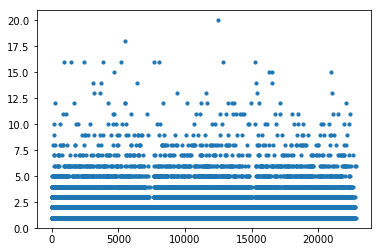

In [53]:
plt.scatter(airbnb_df.index, airbnb_df.beds, s=10)

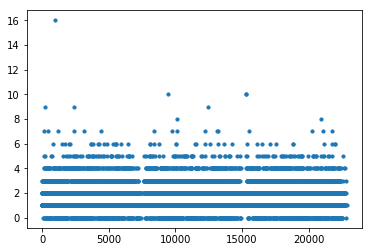

In [54]:
plt.scatter(airbnb_df.index, airbnb_df.bedrooms, s=10)

#### Minimum income per month

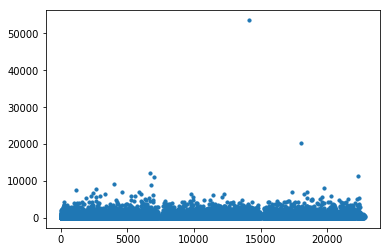

In [55]:
plt.scatter(airbnb_df.index, airbnb_df.min_income_per_month, s=10)

We plot the **min_income_per_month** feature, to notice that there are still some problematic values.

We consider a value of **7000$** income per month as potentially unusual. Let's now investigate..

In [56]:
list = airbnb_df[(airbnb_df['min_income_per_month'] > 7000)]

list[['name','price','min_income_per_month']]

,name,price,min_income_per_month
1162,Victorian mansion with luxury space,959,7672.000000
2653,Stylish Apartment in Central Business District,321,7937.871429
4019,High Life Experience 58th Floor+6 Star Amenities!,646,9191.657143
6730,TWIG: Lux Apt with WiFi / Foxtel / 2 Parking ...,539,12127.500000
6749,RODEN RESIDENCES 1,550,8839.285714
7009,"3 b/r family home Malvern, central school loca...",651,11160.000000
14143,"Berwick, australia Single family home",12501,53575.714286
17340,"Sunny, Modern Apartment with Cityscape Views",244,7110.857143
18042,CBD Sky view 3BR/2BA Apt Free Park/Free Tram Zone,2171,20376.385714
18513,HUGE family apartment in the middle of the CBD,550,7071.428571


Some price value seems to be problematic... After checking the different ads on Airbnb website we decided to drop the rows with a price per night over **999$**, and the ones without any **price**.

In [57]:
airbnb_df.drop(airbnb_df[airbnb_df.price > 999].index, inplace=True)

airbnb_df.drop(airbnb_df[airbnb_df.price == 0].index, inplace=True)

list = airbnb_df[(airbnb_df['min_income_per_month'] > 7000)]

list[['name','price','min_income_per_month']]

,name,price,min_income_per_month
1162,Victorian mansion with luxury space,959,7672.000000
2653,Stylish Apartment in Central Business District,321,7937.871429
4019,High Life Experience 58th Floor+6 Star Amenities!,646,9191.657143
6730,TWIG: Lux Apt with WiFi / Foxtel / 2 Parking ...,539,12127.500000
6749,RODEN RESIDENCES 1,550,8839.285714
7009,"3 b/r family home Malvern, central school loca...",651,11160.000000
17340,"Sunny, Modern Apartment with Cityscape Views",244,7110.857143
18513,HUGE family apartment in the middle of the CBD,550,7071.428571
19795,Contemporary 2BR Apartment with Breathtaking V...,500,8028.571429
22341,★ Huge Family Home in Hawthorn ★,999,11417.142857


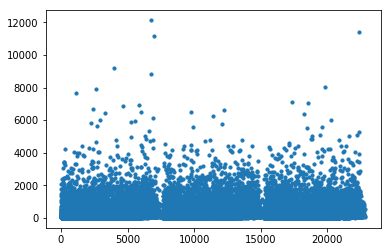

In [58]:
plt.scatter(airbnb_df.index, airbnb_df.min_income_per_month, s=10)

#### Final checking & cleaning

In [59]:
for column in airbnb_df.isnull().columns.values.tolist():
    print(column)
    print (airbnb_df.isnull()[column].value_counts())
    print("")

id
False    17492
Name: id, dtype: int64

name
False    17492
Name: name, dtype: int64

suburb
False    17492
Name: suburb, dtype: int64

zipcode
False    17492
Name: zipcode, dtype: int64

smart_location
False    17492
Name: smart_location, dtype: int64

latitude
False    17492
Name: latitude, dtype: int64

longitude
False    17492
Name: longitude, dtype: int64

property_type
False    17492
Name: property_type, dtype: int64

room_type
False    17492
Name: room_type, dtype: int64

accommodates
False    17492
Name: accommodates, dtype: int64

bathrooms
False    17492
Name: bathrooms, dtype: int64

bedrooms
False    17492
Name: bedrooms, dtype: int64

beds
False    17492
Name: beds, dtype: int64

price
False    17492
Name: price, dtype: int64

minimum_nights
False    17492
Name: minimum_nights, dtype: int64

availability_365
False    17492
Name: availability_365, dtype: int64

number_of_reviews
False    17492
Name: number_of_reviews, dtype: int64

first_review
False    17492
Name: first_

**Correct data format**

We are almost there, for the Airbnb Dataframe.

The last step in our data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).


In [60]:
airbnb_df.dtypes

id                        int64
name                     object
suburb                   object
zipcode                 float64
smart_location           object
latitude                float64
longitude               float64
property_type            object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                      int64
price                     int64
minimum_nights          float64
availability_365          int64
number_of_reviews         int64
first_review             object
last_review              object
review_scores_rating    float64
cancellation_policy      object
reviews_per_month       float64
min_night_per_month     float64
min_night_per_year      float64
occupancy_rate          float64
min_income_per_year     float64
min_income_per_month    float64
dtype: object

#### float64 to int64

Most of numerical data, in the dataframe are integers (Ie. number of rooms, car, etc.). Let's keep them as such in the dataframe.

In [61]:
airbnb_df[["bathrooms", "bedrooms", "beds", "minimum_nights", "zipcode"]] = airbnb_df[["bathrooms", "bedrooms", "beds", "minimum_nights","zipcode"]].astype("int")

In [62]:
for column in airbnb_df.isnull().columns.values.tolist():
    print(column)
    print (airbnb_df.isnull()[column].value_counts())
    print("")

id
False    17492
Name: id, dtype: int64

name
False    17492
Name: name, dtype: int64

suburb
False    17492
Name: suburb, dtype: int64

zipcode
False    17492
Name: zipcode, dtype: int64

smart_location
False    17492
Name: smart_location, dtype: int64

latitude
False    17492
Name: latitude, dtype: int64

longitude
False    17492
Name: longitude, dtype: int64

property_type
False    17492
Name: property_type, dtype: int64

room_type
False    17492
Name: room_type, dtype: int64

accommodates
False    17492
Name: accommodates, dtype: int64

bathrooms
False    17492
Name: bathrooms, dtype: int64

bedrooms
False    17492
Name: bedrooms, dtype: int64

beds
False    17492
Name: beds, dtype: int64

price
False    17492
Name: price, dtype: int64

minimum_nights
False    17492
Name: minimum_nights, dtype: int64

availability_365
False    17492
Name: availability_365, dtype: int64

number_of_reviews
False    17492
Name: number_of_reviews, dtype: int64

first_review
False    17492
Name: first_

In [63]:
airbnb_df.dtypes

id                        int64
name                     object
suburb                   object
zipcode                   int64
smart_location           object
latitude                float64
longitude               float64
property_type            object
room_type                object
accommodates              int64
bathrooms                 int64
bedrooms                  int64
beds                      int64
price                     int64
minimum_nights            int64
availability_365          int64
number_of_reviews         int64
first_review             object
last_review              object
review_scores_rating    float64
cancellation_policy      object
reviews_per_month       float64
min_night_per_month     float64
min_night_per_year      float64
occupancy_rate          float64
min_income_per_year     float64
min_income_per_month    float64
dtype: object

In [64]:
airbnb_df.reset_index(drop=True , inplace = True)

airbnb_df.head()

,id,name,suburb,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,...,first_review,last_review,review_scores_rating,cancellation_policy,reviews_per_month,min_night_per_month,min_night_per_year,occupancy_rate,min_income_per_year,min_income_per_month
0,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,St Kilda,3182,"St Kilda, Australia",-37.859755,144.977369,Apartment,Entire home/apt,3,...,8/4/2010,11/7/2018,94.0,strict_14_with_grace_period,0.15,0.642857,7.714286,0.023663,1226.571429,102.214286
1,38271,Melbourne - Old Trafford Apartment,Berwick,3806,"Berwick, Australia",-38.057254,145.339356,Apartment,Entire home/apt,5,...,11/24/2010,12/1/2018,97.0,flexible,1.14,1.628571,19.542857,0.059582,1915.200000,159.600000
2,43429,Tranquil Javanese-Style Apartment in Oakleigh ...,Oakleigh East,3166,"Oakleigh East, Australia",-37.899601,145.114475,Apartment,Entire home/apt,2,...,12/5/2010,12/3/2018,97.0,moderate,1.72,4.914286,58.971429,0.190230,5779.200000,481.600000
3,50492,St Kilda Central LUXE 2BR APT+TWO COURTYARDS+WIFI,St Kilda,3182,"St Kilda, Australia",-37.861275,144.980379,Apartment,Entire home/apt,4,...,11/30/2012,12/2/2018,97.0,strict_14_with_grace_period,0.60,2.571429,30.857143,0.097649,5862.857143,488.571429
4,62606,A Room Near the Park,Melbourne,3187,"Melbourne, Australia",-37.928173,145.025176,House,Private room,2,...,3/5/2011,11/29/2018,84.0,moderate,0.22,0.628571,7.542857,0.022997,377.142857,31.428571


In [65]:
airbnb_df["first_review"] =  pd.to_datetime(airbnb_df["first_review"])

airbnb_df["last_review"] =  pd.to_datetime(airbnb_df["last_review"])


project.save_data(file_name = "airbnb_clean.csv",data = airbnb_df.to_csv(index=False), overwrite = True)

{'file_name': 'airbnb_clean.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'airbnbinvestmentinmelbourneaustra-donotdelete-pr-u7czrdfljykae0',
 'asset_id': 'e776201e-ef8f-4c1e-9a61-3a38c410693c'}

In [66]:
airbnb_df.shape

(17492, 27)

The final dataframe has **27** columns, and **17482** rows. We are now ready for proper **data vizualization** !

In [67]:
airbnb_df.describe()

,id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,min_night_per_month,min_night_per_year,occupancy_rate,min_income_per_year,min_income_per_month
count,1.749200e+04,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000,17492.000000
mean,1.771645e+07,3114.944375,-37.825612,145.008702,3.519666,1.232106,1.527327,2.027155,136.887091,2.127087,270.740567,27.670135,94.255660,1.593622,3.850335,46.204018,0.223188,6338.555150,526.767374
std,7.871652e+06,264.639852,0.065365,0.129127,2.194898,0.513365,0.910617,1.511341,106.254111,1.491126,115.957131,42.515945,8.452414,1.722104,3.955892,47.470704,0.228944,8594.742815,706.870352
min,9.835000e+03,2010.000000,-38.224427,144.531993,1.000000,0.000000,0.000000,1.000000,12.000000,1.000000,3.000000,1.000000,20.000000,0.010000,0.028571,0.342857,0.000939,7.200000,0.600000
25%,1.187326e+07,3006.000000,-37.849747,144.957247,2.000000,1.000000,1.000000,1.000000,71.000000,1.000000,162.000000,3.000000,93.000000,0.310000,0.857143,10.285714,0.040661,1002.428571,83.535714
50%,1.908679e+07,3067.000000,-37.816785,144.977242,3.000000,1.000000,1.000000,2.000000,114.000000,2.000000,338.000000,11.000000,97.000000,1.000000,2.500000,30.000000,0.144412,3290.400000,274.200000
75%,2.361826e+07,3161.000000,-37.803197,145.007922,4.000000,1.000000,2.000000,2.000000,161.000000,2.000000,365.000000,33.000000,100.000000,2.300000,5.714286,68.571429,0.331643,8514.514286,709.464286
max,3.054094e+07,30122.000000,-37.486284,145.831408,16.000000,8.000000,10.000000,20.000000,999.000000,10.000000,365.000000,538.000000,100.000000,14.540000,29.700000,356.400000,0.999392,145530.000000,12127.500000
